In [ ]:
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
# Vectorize training data
X_train = vectorize_sequences(train_data)

In [ ]:
# Vectorize Testing Data
X_test = vectorize_sequences(test_data)
X_train.shape

(8982, 10000)

In [ ]:
Y_train= np.asarray(train_labels).astype('float32')
Y_test= np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 64ms/step - loss: 0.1254 - accuracy: 0.9587 - val_loss: 0.9622 - val_accuracy: 0.8120
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 0.1215 - accuracy: 0.9569 - val_loss: 0.9762 - val_accuracy: 0.8140
Epoch 3/20
16/16 [==============================] - 1s 59ms/step - loss: 0.1187 - accuracy: 0.9574 - val_loss: 0.9993 - val_accuracy: 0.7970
Epoch 4/20
16/16 [==============================] - 1s 61ms/step - loss: 0.1124 - accuracy: 0.9602 - val_loss: 0.9801 - val_accuracy: 0.8040
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.1121 - accuracy: 0.9577 - val_loss: 1.0674 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 73ms/step - loss: 0.1149 - accuracy: 0.9564 - val_loss: 1.0240 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.1059 - accuracy: 0.9589 - val_loss: 1.0217 - val_accuracy: 0.8090
Epoch 8/20
16

In [ ]:
test_loss, test_acc = model.evaluate(x_val,y_val)
print(f'Test Accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

32/32 [==============================] - 0s 4ms/step - loss: 0.9426 - accuracy: 0.8110
Test Accuracy: 0.8109999895095825
Test loss: 0.9426229000091553


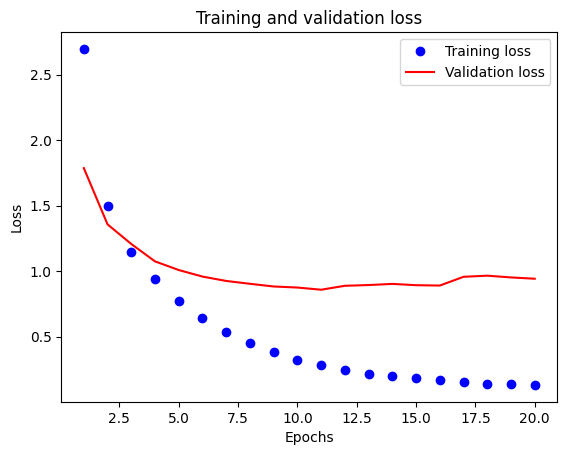

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

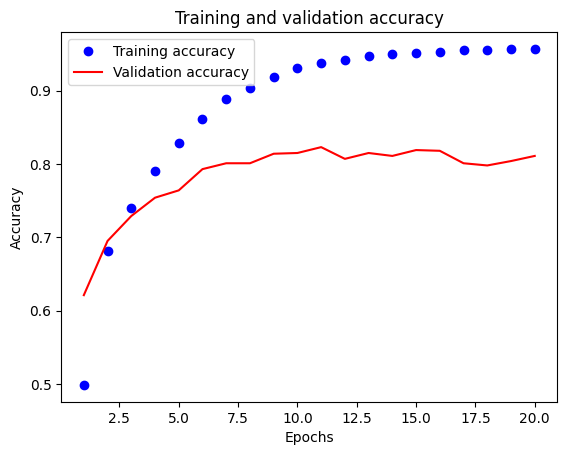

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()